In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
ssts = pd.read_csv('Submmit_Sample_testing_Set.csv')
tbxi = pd.read_csv('test_buy_x_info.csv')
tcxi = pd.read_csv('test_cust_x_info.csv')
ttxi = pd.read_csv('test_tpy_x_info.csv')
tbi = pd.read_csv('train_buy_info.csv')
tci = pd.read_csv('train_cust_info.csv')
tti = pd.read_csv('train_tpy_info.csv')

# 上下合併訓練資料集跟測試資料集

In [3]:
a = pd.concat([tbi,tbxi], axis=0)
b = pd.concat([tci,tcxi], axis=0)
c = pd.concat([tti,ttxi], axis=0)

/Users/charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


# 昱萱超棒把該死ㄉ雞婆ㄉ東西給搞好ㄌ

In [4]:
tbi = a.reindex_axis(tbi.columns, axis=1)
tci = b.reindex_axis(tci.columns, axis=1)
tti = c.reindex_axis(tti.columns, axis=1)

/Users/charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.
/Users/charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  
/Users/charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# 把職業變成大類別

In [5]:
occ = pd.DataFrame(tbi['OCCUPATION'])
result = occ['OCCUPATION'].str.split('([a-z]+)([0-9]+)', expand=True)
result = result.loc[:,[1,2]]
result.rename(columns={1:'x', 2:'y'}, inplace=True)
result['x'].value_counts() #22
tbi['OCCUPATION'] = result['x']

# 合併所有資料

In [6]:
train = tbi.merge(tci, on = 'CUST_ID')
train = train.merge(tti, on = 'CUST_ID')

# 插補<br>
# 依照現有欄位分佈去做補值

In [7]:
train = train.drop(['STATUS1', 'STATUS2', 'STATUS3', 'STATUS4', 'INTEREST1', 'INTEREST2', 'INTEREST3', 'INTEREST4', 'INTEREST5', 'INTEREST6', 'INTEREST7', 'INTEREST8', 'INTEREST9', 'INTEREST10'], axis=1)
train = train.drop(['IS_NEWSLETTER'], axis = 1)
train['HEIGHT'].fillna(train['HEIGHT'].mean(), inplace = True)
train['WEIGHT'].fillna(train['WEIGHT'].mean(), inplace = True)
fill_list = ['a', 'b', 'c']
train['BEHAVIOR_1'] = train['BEHAVIOR_1'].fillna(pd.Series(np.random.choice(fill_list, size=len(train.index))))
train['BEHAVIOR_2'] = train['BEHAVIOR_2'].fillna(pd.Series(np.random.choice(fill_list, size=len(train.index))))
train['BEHAVIOR_3'] = train['BEHAVIOR_3'].fillna(pd.Series(np.random.choice(fill_list, size=len(train.index))))
fill=['a','b']
train['IS_EMAIL'] = train['IS_EMAIL'].fillna(pd.Series(np.random.choice(fill, size=len(train.index))))
train['IS_PHONE'] = train['IS_PHONE'].fillna(pd.Series(np.random.choice(fill, size=len(train.index))))
train['IS_APP'] = train['IS_APP'].fillna(pd.Series(np.random.choice(fill, size=len(train.index))))
train['IS_SPECIALMEMBER'] = train['IS_SPECIALMEMBER'].fillna(pd.Series(np.random.choice(fill, size=len(train.index))))
train['CHARGE_WAY'] = train['CHARGE_WAY'].fillna(pd.Series(np.random.choice(fill, size=len(train.index))))

In [8]:
fill=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v']
train['OCCUPATION'] = train['OCCUPATION'].fillna(pd.Series(np.random.choice(fill, size=len(train.index))))

# 再看一下資料

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239504 entries, 0 to 239503
Data columns (total 32 columns):
CUST_ID               239504 non-null int64
BUY_TYPE              229504 non-null object
AGE                   239504 non-null object
SEX                   239504 non-null object
HEIGHT                239504 non-null float64
WEIGHT                239504 non-null float64
OCCUPATION            239504 non-null object
CHILD_NUM             239504 non-null int64
BUY_MONTH             239504 non-null int64
BUY_YEAR              239504 non-null object
CITY_CODE             239504 non-null object
BUDGET                239504 non-null float64
MARRIAGE              239504 non-null object
BEHAVIOR_1            239504 non-null object
BEHAVIOR_2            239504 non-null object
BEHAVIOR_3            239504 non-null object
EDUCATION             239504 non-null object
CHARGE_WAY            239504 non-null object
IS_EMAIL              239504 non-null object
IS_PHONE              239504 non-n

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers import Merge
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import h5py
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn import preprocessing
from keras.layers import Dropout

Using TensorFlow backend.
/Users/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 懶得改下面代號 純粹多餘動作

In [11]:
train_2 = train

# 把顧客編號、BUY_MONTH拿掉<br>
# xtrain + xtest 做label encoder<br> 
# y = 預測目標

In [12]:
features_cat = [2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
train_test =  train_2.iloc[:,features_cat]
y = train_2.iloc[:,1]

In [13]:
train_test = copy.copy(train_test).values

In [14]:
les = []
for i in range(train_test.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(train_2.iloc[:,features_cat].iloc[:, i])
    les.append(le)
    train_test[:, i] = le.transform(train_test[:, i])
#     X_test_dnn_cat[:, i] = le.transform(X_test_dnn_cat[:, i])

# 看一下 x train + x test 的 shape

In [15]:
print(train_test.shape)

(239504, 29)


In [16]:
train_test[1]

array([10, 0, 128, 56, 8, 0, 0, 20, 19152, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 3, 6, 4, 6, 6, 6, 6], dtype=object)

# seperate train and test

In [17]:
X_train = train_test[:229504,:]
X_test = train_test[229504:,:]

In [18]:
X_test

array([[10, 0, 130, ..., 6, 6, 6],
       [2, 1, 130, ..., 6, 5, 6],
       [4, 1, 155, ..., 6, 6, 4],
       ...,
       [7, 1, 145, ..., 6, 5, 6],
       [6, 1, 155, ..., 4, 4, 4],
       [2, 0, 131, ..., 6, 4, 4]], dtype=object)

In [19]:
print(X_train.shape)

(229504, 29)


In [20]:
y = y[:229504,]
y.shape

(229504,)

# split train data into train and validation

In [21]:
msk = np.random.rand(len(X_train)) < 0.8

In [22]:
X_train_cat = X_train[msk]

In [23]:
X_test_cat = X_train[~msk]

In [24]:
X_train_dnn_cat = X_train_cat
X_test_dnn_cat = X_test_cat

In [25]:
y_train = y[msk]

In [26]:
y_test = y[~msk]

# also label encode variable y

In [27]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)

In [28]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)

In [29]:
print(X_train_dnn_cat.shape)

(183556, 29)


In [30]:
X_train_dnn_cat[1]

array([10, 0, 128, 56, 8, 0, 0, 20, 19152, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 3, 6, 4, 6, 6, 6, 6], dtype=object)

In [31]:
y_train.shape

(183556,)

# ㄜ我想這就是一個自定義函數 大概是直觀ㄉsplit featureㄅ

In [32]:
#要embeddingㄉ 降維1/2倍

def split_features(X):
    X_list = []

    AGE = X[..., [0]]
    X_list.append(AGE)

    SEX = X[..., [1]]
    X_list.append(SEX)
    
    HEIGHT = X[..., [2]]
    X_list.append(HEIGHT)
    
    WEIGHT = X[..., [3]]
    X_list.append(WEIGHT)

    OCCUPATION = X[..., [4]]
    X_list.append(OCCUPATION)
    
    CHILD_NUM = X[..., [5]]
    X_list.append(CHILD_NUM)

    BUY_MONTH = X[..., [6]]
    X_list.append(BUY_MONTH)

    CITY_CODE = X[..., [7]]
    X_list.append(CITY_CODE)
    
    BUDGET = X[..., [8]]
    X_list.append(BUDGET)
    
    MARRIAGE = X[..., [9]]
    X_list.append(MARRIAGE)

    BEHAVIOR_1 = X[..., [10]]
    X_list.append(BEHAVIOR_1)
    
    BEHAVIOR_2 = X[..., [11]]
    X_list.append(BEHAVIOR_2)

    BEHAVIOR_3 = X[..., [12]]
    X_list.append(BEHAVIOR_3)

    EDUCATION = X[..., [13]]
    X_list.append(EDUCATION)

    CHARGE_WAY = X[..., [14]]
    X_list.append(CHARGE_WAY)

    IS_MAIL = X[..., [15]]
    X_list.append(IS_MAIL)
    
    IS_PHONE = X[..., [16]]
    X_list.append(IS_PHONE)

    IS_APP = X[..., [17]]
    X_list.append(IS_APP)

    IS_SPECIALMEMBER = X[..., [18]]
    X_list.append(IS_SPECIALMEMBER)

    PARENTS_DEAD = X[..., [19]]
    X_list.append(PARENTS_DEAD)

    REAL_ESTATE_HAVE = X[..., [20]]
    X_list.append(REAL_ESTATE_HAVE)

    IS_MAJOR_INCOME = X[..., [21]]
    X_list.append(IS_MAJOR_INCOME)

    BUY_TYP1_NUM_CLASS = X[..., [22]]
    X_list.append(BUY_TYP1_NUM_CLASS)

    BUY_TYP2_NUM_CLASS = X[..., [23]]
    X_list.append(BUY_TYP2_NUM_CLASS)

    BUY_TYP3_NUM_CLASS = X[..., [24]]
    X_list.append(BUY_TYP3_NUM_CLASS)

    BUY_TYP4_NUM_CLASS = X[..., [25]]
    X_list.append(BUY_TYP4_NUM_CLASS)

    BUY_TYP5_NUM_CLASS = X[..., [26]]
    X_list.append(BUY_TYP5_NUM_CLASS)

    BUY_TYP6_NUM_CLASS = X[..., [27]]
    X_list.append(BUY_TYP6_NUM_CLASS)

    BUY_TYP7_NUM_CLASS = X[..., [28]]
    X_list.append(BUY_TYP7_NUM_CLASS)

    return X_list

# 好ㄛ 來ㄍembedding 不要懷疑 就是這樣

In [62]:
class NN_with_EntityEmbedding():
    def __init__(self, X_train, y_train, X_val, y_val, X_test):
        self.nb_epoch = 30
        self.__build_keras_model()
        self.fit(X_train, y_train, X_val, y_val)
        self.predict(X_test)

    def preprocessing(self, X):
        X_list = split_features(X)
        return X_list
    def __build_keras_model(self):
        models = []
        
        model_AGE = Sequential()
        model_AGE.add(Embedding(len(les[0].classes_), 8, input_length=1))
        model_AGE.add(Reshape(target_shape=(8,)))
        models.append(model_AGE)
        
        model_SEX = Sequential()
        model_SEX.add(Embedding(len(les[1].classes_), 1, input_length=1))
        model_SEX.add(Reshape(target_shape=(1,)))
        models.append(model_SEX)
        
        model_HEIGHT = Sequential()
        model_HEIGHT.add(Embedding(len(les[2].classes_),1, input_length=1))
        model_HEIGHT.add(Reshape(target_shape=(1,)))
        models.append(model_HEIGHT)
        
        model_WEIGHT = Sequential()
        model_WEIGHT.add(Embedding(len(les[3].classes_),1, input_length=1))
        model_WEIGHT.add(Reshape(target_shape=(1,)))
        models.append(model_WEIGHT)

        model_OCCUPATION = Sequential()
        model_OCCUPATION.add(Embedding(len(les[4].classes_), 11, input_length=1))
        model_OCCUPATION.add(Reshape(target_shape=(11,)))
        models.append(model_OCCUPATION)
        
        model_CHILD_NUM = Sequential()
        model_CHILD_NUM.add(Embedding(len(les[5].classes_),1, input_length=1))
        model_CHILD_NUM.add(Reshape(target_shape=(1,)))
        models.append(model_CHILD_NUM)
        
        model_BUY_MONTH = Sequential()
        model_BUY_MONTH.add(Embedding(len(les[6].classes_), 6, input_length=1))
        model_BUY_MONTH.add(Reshape(target_shape=(6,)))
        models.append(model_BUY_MONTH)
        
        model_CITY_CODE = Sequential()
        model_CITY_CODE.add(Embedding(len(les[7].classes_), 11, input_length=1))
        model_CITY_CODE.add(Reshape(target_shape=(11,)))
        models.append(model_CITY_CODE)
        
        model_BUDGET = Sequential()
        model_BUDGET.add(Embedding(len(les[8].classes_),1, input_length=1))
        model_BUDGET.add(Reshape(target_shape=(1,)))
        models.append(model_BUDGET)

        model_MARRIAGE = Sequential()
        model_MARRIAGE.add(Embedding(len(les[9].classes_), 3, input_length=1))
        model_MARRIAGE.add(Reshape(target_shape=(3,)))
        models.append(model_MARRIAGE)
        
        model_BEHAVIOR_1 = Sequential()
        model_BEHAVIOR_1.add(Embedding(len(les[10].classes_), 1, input_length=1))
        model_BEHAVIOR_1.add(Reshape(target_shape=(1,)))
        models.append(model_BEHAVIOR_1)
        
        model_BEHAVIOR_2 = Sequential()
        model_BEHAVIOR_2.add(Embedding(len(les[11].classes_), 1, input_length=1))
        model_BEHAVIOR_2.add(Reshape(target_shape=(1,)))
        models.append(model_BEHAVIOR_2)
        
        model_BEHAVIOR_3 = Sequential()
        model_BEHAVIOR_3.add(Embedding(len(les[12].classes_), 1, input_length=1))
        model_BEHAVIOR_3.add(Reshape(target_shape=(1,)))
        models.append(model_BEHAVIOR_3)
        
        model_EDUCATION = Sequential()
        model_EDUCATION.add(Embedding(len(les[13].classes_), 2, input_length=1))
        model_EDUCATION.add(Reshape(target_shape=(2,)))
        models.append(model_EDUCATION)
        
        model_CHARGE_WAY = Sequential()
        model_CHARGE_WAY.add(Embedding(len(les[14].classes_), 1, input_length=1))
        model_CHARGE_WAY.add(Reshape(target_shape=(1,)))
        models.append(model_CHARGE_WAY)
        
        model_IS_EMAIL = Sequential()
        model_IS_EMAIL.add(Embedding(len(les[15].classes_), 1, input_length=1))
        model_IS_EMAIL.add(Reshape(target_shape=(1,)))
        models.append(model_IS_EMAIL)
        
        model_IS_PHONE = Sequential()
        model_IS_PHONE.add(Embedding(len(les[16].classes_), 1, input_length=1))
        model_IS_PHONE.add(Reshape(target_shape=(1,)))
        models.append(model_IS_PHONE)
        
        model_IS_APP = Sequential()
        model_IS_APP.add(Embedding(len(les[17].classes_), 1, input_length=1))
        model_IS_APP.add(Reshape(target_shape=(1,)))
        models.append(model_IS_APP)

        model_IS_SPECIALMEMBER = Sequential()
        model_IS_SPECIALMEMBER.add(Embedding(len(les[18].classes_), 1, input_length=1))
        model_IS_SPECIALMEMBER.add(Reshape(target_shape=(1,)))
        models.append(model_IS_SPECIALMEMBER)
        
        PARENTS_DEAD = Sequential()
        PARENTS_DEAD.add(Embedding(len(les[19].classes_), 1, input_length=1))
        PARENTS_DEAD.add(Reshape(target_shape=(1,)))
        models.append(PARENTS_DEAD)
        
        REAL_ESTATE_HAVE = Sequential()
        REAL_ESTATE_HAVE.add(Embedding(len(les[20].classes_), 1, input_length=1))
        REAL_ESTATE_HAVE.add(Reshape(target_shape=(1,)))
        models.append(REAL_ESTATE_HAVE)
        
        IS_MAJOR_INCOME = Sequential()
        IS_MAJOR_INCOME.add(Embedding(len(les[21].classes_), 3, input_length=1))
        IS_MAJOR_INCOME.add(Reshape(target_shape=(3,)))
        models.append(IS_MAJOR_INCOME)
        
        BUY_TYP1_NUM_CLASS = Sequential()
        BUY_TYP1_NUM_CLASS.add(Embedding(len(les[22].classes_), 3, input_length=1))
        BUY_TYP1_NUM_CLASS.add(Reshape(target_shape=(3,)))
        models.append(BUY_TYP1_NUM_CLASS)
        
        BUY_TYP2_NUM_CLASS = Sequential()
        BUY_TYP2_NUM_CLASS.add(Embedding(len(les[23].classes_), 2, input_length=1))
        BUY_TYP2_NUM_CLASS.add(Reshape(target_shape=(2,)))
        models.append(BUY_TYP2_NUM_CLASS)
        
        BUY_TYP3_NUM_CLASS = Sequential()
        BUY_TYP3_NUM_CLASS.add(Embedding(len(les[24].classes_), 2, input_length=1))
        BUY_TYP3_NUM_CLASS.add(Reshape(target_shape=(2,)))
        models.append(BUY_TYP3_NUM_CLASS)
        
        BUY_TPY4_NUM_CLASS = Sequential()
        BUY_TPY4_NUM_CLASS.add(Embedding(len(les[25].classes_), 3, input_length=1))
        BUY_TPY4_NUM_CLASS.add(Reshape(target_shape=(3,)))
        models.append(BUY_TPY4_NUM_CLASS)
        
        BUY_TPY5_NUM_CLASS = Sequential()
        BUY_TPY5_NUM_CLASS.add(Embedding(len(les[26].classes_), 3, input_length=1))
        BUY_TPY5_NUM_CLASS.add(Reshape(target_shape=(3,)))
        models.append(BUY_TPY5_NUM_CLASS)
        
        BUY_TPY6_NUM_CLASS = Sequential()
        BUY_TPY6_NUM_CLASS.add(Embedding(len(les[27].classes_), 3, input_length=1))
        BUY_TPY6_NUM_CLASS.add(Reshape(target_shape=(3,)))
        models.append(BUY_TPY6_NUM_CLASS)
        
        BUY_TPY7_NUM_CLASS = Sequential()
        BUY_TPY7_NUM_CLASS.add(Embedding(len(les[28].classes_), 3, input_length=1))
        BUY_TPY7_NUM_CLASS.add(Reshape(target_shape=(3,)))
        models.append(BUY_TPY7_NUM_CLASS)
    
        self.model = Sequential()
        self.model.add(Merge(models, mode='concat'))
#         self.model.add(Dense(128))
#         self.model.add(Activation('relu'))
#         self.model.add(Dense(256))
#         self.model.add(Activation('relu'))
        self.model.add(Dense(150))
        self.model.add(Activation('relu'))
#         self.model.add(Dense(500))
#         self.model.add(Activation('relu'))
        self.model.add(Dense(500))
        self.model.add(Activation('relu'))
        self.model.add(Dense(7))
        self.model.add(Activation('softmax'))
        self.model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics=['acc'])
        self.model.summary()
        
    def fit(self, X_train, y_train, X_val, y_val):
        self.model.fit(self.preprocessing(X_train), y_train,
                       validation_data=(self.preprocessing(X_val), y_val),
                       nb_epoch=self.nb_epoch, batch_size=250) #128
        
    def predict(self, X_test):
        result = self.model.predict(self.preprocessing(X_test))
        return result

# 跑一下

In [63]:
X_test.shape

(10000, 29)

In [66]:
from keras.optimizers import SGD,Adagrad,Adadelta,RMSprop,Adamax,Adam

In [67]:
dnn = NN_with_EntityEmbedding(X_train_dnn_cat, dummy_y_train, X_test_dnn_cat, dummy_y_test, X_test)   

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_291 (Embedding)        (None, 1, 8)          136                                          
____________________________________________________________________________________________________
reshape_291 (Reshape)            (None, 8)             0                                            
____________________________________________________________________________________________________
embedding_292 (Embedding)        (None, 1, 1)          2                                            
____________________________________________________________________________________________________
reshape_292 (Reshape)            (None, 1)             0                                            
___________________________________________________________________________________________

183556/183556 [==============================] - 11s - loss: 0.2911 - acc: 0.8972 - val_loss: 0.1793 - val_acc: 0.9298
Epoch 2/30
183556/183556 [==============================] - 9s - loss: 0.1551 - acc: 0.9397 - val_loss: 0.1608 - val_acc: 0.9383
Epoch 3/30
183556/183556 [==============================] - 9s - loss: 0.1374 - acc: 0.9474 - val_loss: 0.1579 - val_acc: 0.9394
Epoch 4/30
183556/183556 [==============================] - 9s - loss: 0.1262 - acc: 0.9521 - val_loss: 0.1554 - val_acc: 0.9413
Epoch 5/30
183556/183556 [==============================] - 9s - loss: 0.1170 - acc: 0.9559 - val_loss: 0.1498 - val_acc: 0.9453
Epoch 6/30
183556/183556 [==============================] - 9s - loss: 0.1097 - acc: 0.9591 - val_loss: 0.1513 - val_acc: 0.9444
Epoch 7/30
183556/183556 [==============================] - 9s - loss: 0.1038 - acc: 0.9617 - val_loss: 0.1479 - val_acc: 0.9468
Epoch 8/30
183556/183556 [==============================] - 9s - loss: 0.0985 - acc: 0.9640 - val_loss: 0.1

In [68]:
weights = dnn.model.get_weights()

In [69]:
pred = dnn.predict(X_test)

In [70]:
pred.shape

(10000, 7)

In [71]:
df = pd.DataFrame(pred)

In [72]:
df['max_value'] = pred.max(axis=1)

In [73]:
dic = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e', 5:'f', 6:'g'}

In [74]:
a=np.array(df)

In [75]:
b = np.argmax(a, axis=1)

In [76]:
pred_result = pd.DataFrame(b).replace(dic)

In [77]:
pred_result = pd.concat([tbxi['CUST_ID'],pred_result], axis = 1)

In [78]:
pred_result.columns = ['CUST_ID', 'BUY_TYPE']

In [83]:
pred_result.to_csv('submit.csv')

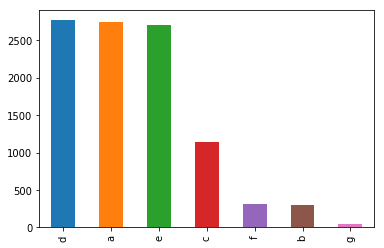

In [80]:
pred_result['BUY_TYPE'].value_counts().plot(kind='bar')

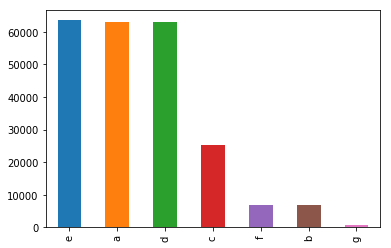

In [81]:
tbi['BUY_TYPE'].value_counts().plot(kind='bar')

In [82]:
tbi['BUY_TYPE'].value_counts()

e    63511
a    63141
d    63097
c    25371
f     6782
b     6772
g      830
Name: BUY_TYPE, dtype: int64